# Exploratory Data Analysis (EDA): Analysis of German Credit Data

**When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision:**
* If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
* If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank

** Objective of Analysis: **
Minimization of risk and maximization of profit on behalf of the bank.

** Data: **
The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants.

** The dataset is available at https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit.csv **

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Get the Data

In [2]:
df = pd.read_csv('13 german_credit.csv',sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

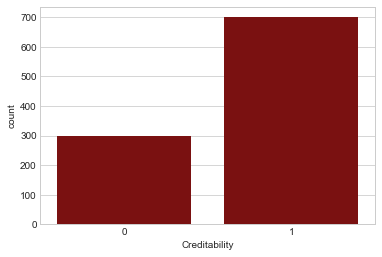

In [3]:
sns.countplot(df['Creditability'],color=("darkred"))

# Feature Engineering

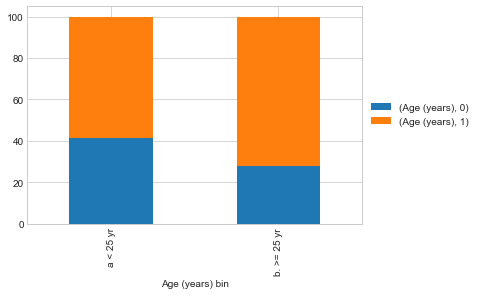

In [4]:
#Age (years) bin
def bin_x (x): 
    if x >= 25: return "b. >= 25 yr"
    elif x < 25: return "a < 25 yr"
    else: return "c. others"
df['Age (years) bin'] = df['Age (years)'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Age (years)'], index=['Age (years) bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

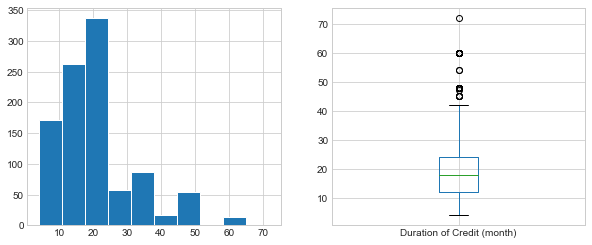

In [5]:
#Duration of Credit (month)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Duration of Credit (month)'].hist(bins=10,edgecolor='white')
plt.subplot(1,2,2)
df[['Duration of Credit (month)']].boxplot()

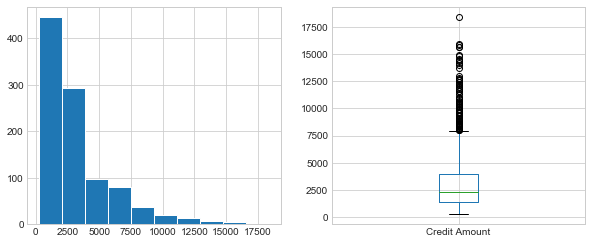

In [6]:
#Credit Amount
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Credit Amount'].hist(bins=10,edgecolor='white')
plt.subplot(1,2,2)
df[['Credit Amount']].boxplot()

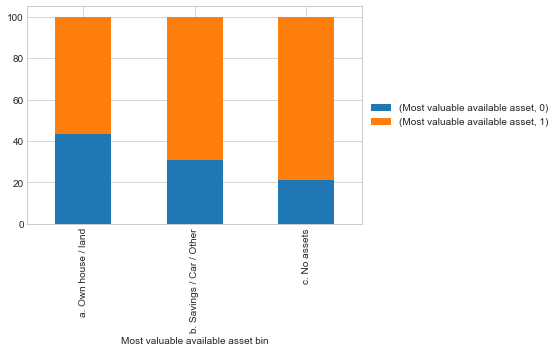

In [7]:
#Most valuable available asset bin
def bin_x (x): 
    if x == 4: return "a. Own house / land"
    elif x == 3: return "b. Savings / Car / Other"
    elif x == 2: return "b. Savings / Car / Other"
    elif x == 1: return "c. No assets"
    else: return "d. others"
df['Most valuable available asset bin'] = df['Most valuable available asset'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Most valuable available asset'], index=['Most valuable available asset bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

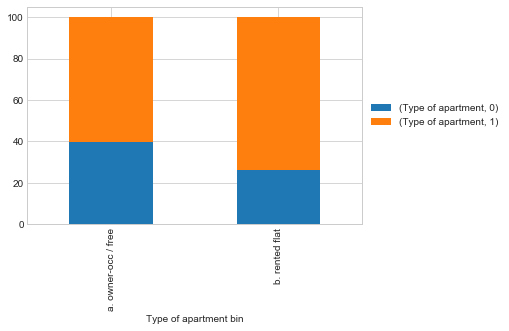

In [8]:
#Type of apartment bin
def bin_x (x): 
    if x == 3: return "a. owner-occ / free"
    if x == 1: return "a. owner-occ / free"
    elif x == 2: return "b. rented flat"
    else: return "c. others"
df['Type of apartment bin'] = df['Type of apartment'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Type of apartment'], index=['Type of apartment bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

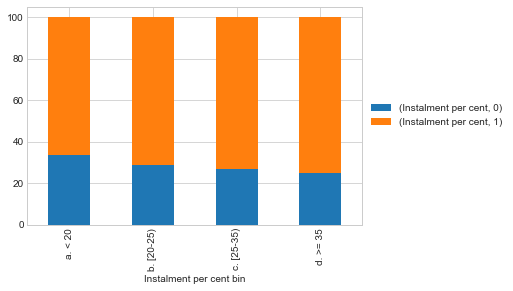

In [9]:
#Instalment per cent bin
def bin_x (x): 
    if x == 4: return "a. < 20"
    elif x == 3: return "b. [20-25)"
    elif x == 2: return "c. [25-35)"
    elif x == 1: return "d. >= 35"
    else: return "e. others"
df['Instalment per cent bin'] = df['Instalment per cent'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Instalment per cent'], index=['Instalment per cent bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

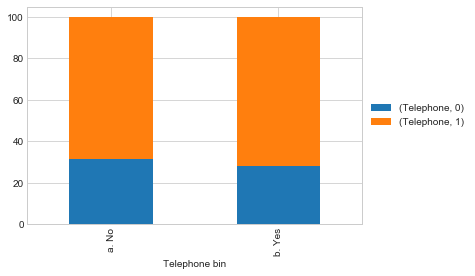

In [10]:
#Telephone bin
def bin_x (x): 
    if x == 1: return "a. No"
    elif x == 2: return "b. Yes"
    else: return "c. others"
df['Telephone bin'] = df['Telephone'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Telephone'], index=['Telephone bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

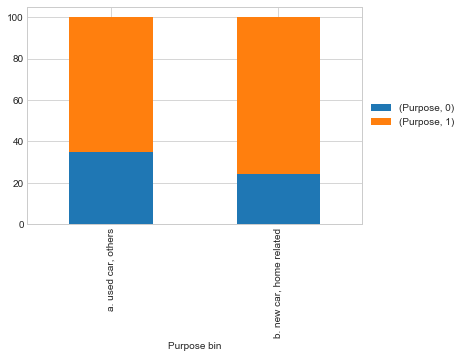

In [11]:
#Purpose bin
def bin_x (x): 
    if x in (2,7,8,9,10,0): return "a. used car, others"
    elif x in (1,3,4,5,6): return "b. new car, home related"
    else: return "c. others"
df['Purpose bin'] = df['Purpose'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Purpose'], index=['Purpose bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

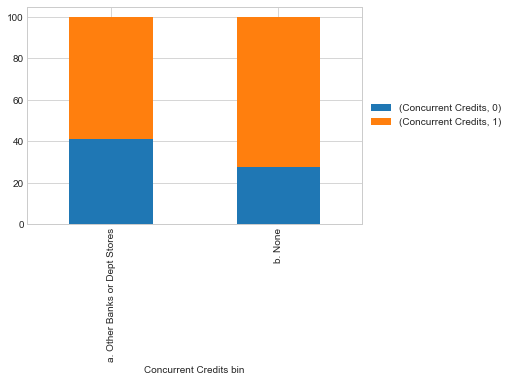

In [12]:
#Concurrent Credits bin
def bin_x (x):
    if x in (1,2): return "a. Other Banks or Dept Stores"
    elif x == 3: return "b. None"
    else: return "c. others"
df['Concurrent Credits bin'] = df['Concurrent Credits'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Concurrent Credits'], index=['Concurrent Credits bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

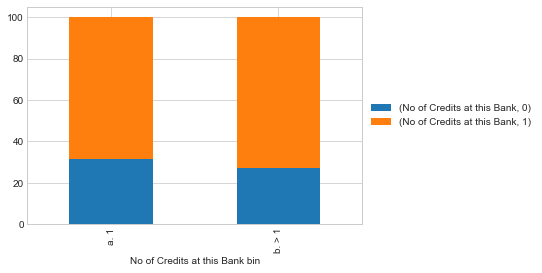

In [13]:
#No of Credits at this Bank bin
def bin_x (x):
    if x == 1: return "a. 1"
    elif x in (2,3,4): return "b. > 1"
    else: return "c. others"
df['No of Credits at this Bank bin'] = df['No of Credits at this Bank'].apply(bin_x)
    
x_chart = df.pivot_table(values=['No of Credits at this Bank'], index=['No of Credits at this Bank bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

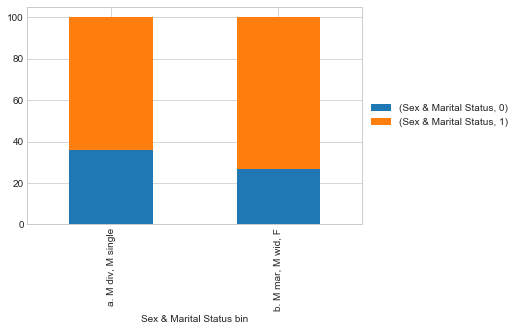

In [14]:
#Sex & Marital Status bin
def bin_x (x): 
    if x == 1: return "a. M div, M single"
    elif x == 2: return "a. M div, M single"
    elif x == 3: return "b. M mar, M wid, F"
    elif x == 4: return "b. M mar, M wid, F"
    else: return "c. others"
df['Sex & Marital Status bin'] = df['Sex & Marital Status'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Sex & Marital Status'], index=['Sex & Marital Status bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

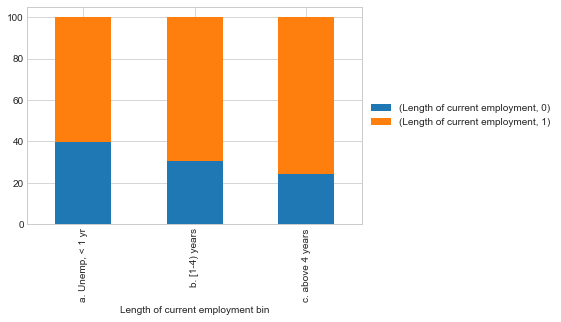

In [15]:
#Length of current employment bin
def bin_x (x): 
    if x in (1,2): return "a. Unemp, < 1 yr"
    elif x == 3: return "b. [1-4) years"
    elif x in (4,5): return "c. above 4 years"
    else: return "d. others"
df['Length of current employment bin'] = df['Length of current employment'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Length of current employment'], index=['Length of current employment bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

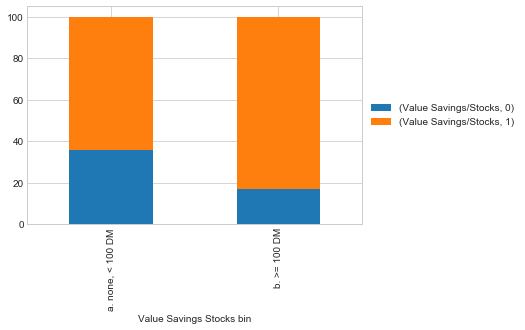

In [16]:
#Value Savings Stocks bin
def bin_x (x): 
    if x in (1,2): return "a. none, < 100 DM"
    elif x in (3,4,5): return "b. >= 100 DM"
    else: return "c. others"
df['Value Savings Stocks bin'] = df['Value Savings/Stocks'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Value Savings/Stocks'], index=['Value Savings Stocks bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

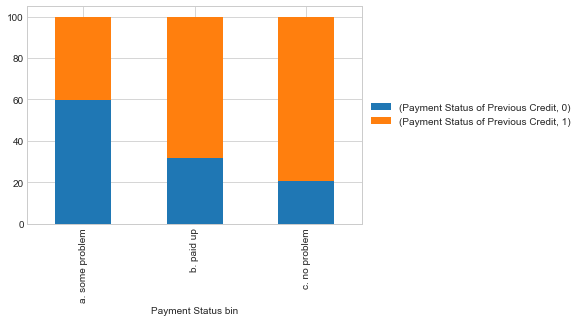

In [17]:
#Payment Status bin
def bin_x (x): 
    if x in (0,1): return "a. some problem"
    elif x == 2: return "b. paid up"
    elif x in (3,4): return "c. no problem"
    else: return "d. others"
df['Payment Status bin'] = df['Payment Status of Previous Credit'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Payment Status of Previous Credit'], index=['Payment Status bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

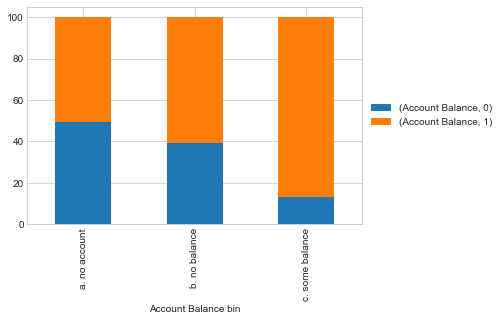

In [18]:
#Account Balance bin
def bin_x (x): 
    if x == 1: return "a. no account"
    elif x == 2: return "b. no balance"
    elif x == 3: return "c. some balance"
    elif x == 4: return "c. some balance"
    else: return "d. others"
df['Account Balance bin'] = df['Account Balance'].apply(bin_x)
    
x_chart = df.pivot_table(values=['Account Balance'], index=['Account Balance bin'], columns=['Creditability'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Output Data

In [19]:
temp = df[['Creditability','Account Balance bin','Payment Status bin','Value Savings Stocks bin',
          'Length of current employment bin','Sex & Marital Status bin','No of Credits at this Bank bin',
          'Concurrent Credits bin','Purpose bin','Telephone bin','Instalment per cent bin','Type of apartment bin',
          'Most valuable available asset bin','Duration of Credit (month)','Credit Amount','Age (years) bin']].copy()

temp.rename(columns = {'Account Balance bin' : 'Acc_Bal_bin',
                       'Payment Status bin' : 'Pay_Status_bin',
                       'Value Savings Stocks bin' : 'Value_SavStock_bin',
                       'Length of current employment bin' : 'Length_Emp_bin',
                       'Sex & Marital Status bin' : 'S&M_Status_bin',
                       'No of Credits at this Bank bin' : 'No_of_Credits_bin',
                       'Concurrent Credits bin' : 'Co_Credits_bin',
                       'Purpose bin' : 'Purpose_bin',
                       'Telephone bin' : 'Telephone_bin',
                       'Instalment per cent bin' : 'Instalment_bin',
                       'Type of apartment bin' : 'Apartment_bin',
                       'Most valuable available asset bin' : 'Most_Val_Asset_bin',
                       'Duration of Credit (month)' : 'Duration_Credit',
                       'Credit Amount' : 'Credit_Amount',
                       'Age (years) bin' : 'Age_bin'}, inplace = True)

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Creditability         1000 non-null int64
Acc_Bal_bin           1000 non-null object
Pay_Status_bin        1000 non-null object
Value_SavStock_bin    1000 non-null object
Length_Emp_bin        1000 non-null object
S&M_Status_bin        1000 non-null object
No_of_Credits_bin     1000 non-null object
Co_Credits_bin        1000 non-null object
Purpose_bin           1000 non-null object
Telephone_bin         1000 non-null object
Instalment_bin        1000 non-null object
Apartment_bin         1000 non-null object
Most_Val_Asset_bin    1000 non-null object
Duration_Credit       1000 non-null int64
Credit_Amount         1000 non-null int64
Age_bin               1000 non-null object
dtypes: int64(3), object(13)
memory usage: 125.1+ KB


In [20]:
temp.to_csv('00 df.csv',index=False)